<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px">
# Tuning K-Means Demo + Lab

![](http://scikit-learn.org/stable/_images/plot_kmeans_silhouette_analysis_003.png)

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Evaluate the results of a K-Means Clustering Analysis

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Opening](#opening)  | Opening  |
| 10 min  | [Introduction](#introduction)   | So I performed a clustering analysis - Now what  |
| 15 min  | [Demo](#demo)  | Techniques to Evaluate Clusters  |
| 25 min  | [Guided Practice](#guided-practice<a name="opening"></a>)  | Practice Cluster Evaluation Techniques |
| 25 min  | [Independent Practice](#ind-practice)  | Perform a k-means cluster analysis and evaluate the results |
| 5 min  | [Conclusion](#conclusion)  | Conclusion  |

---

## (5 mins) How do we use K-Means end-to-end?
Discuss how we would use this step-by-step.

## (5 mins) What are some problems with K-Means?

Discuss some of the shortcomings of K-Means


How might we think about "Good" clusters vs "Bad" clusters ? 

## Introduction

There are tons of problems with K-Means.  Largely, it's possible to get widely different results especially if we use random initialization.

- Different solutions can converge with random initialization
- Not everything can be reflected as a "glob" of points
   - Irregular shapes
   - Different densities
   - Inconsistent cluster spacing
- Interpretation of results dificult without subject matter expertise
   - Accuracy is highly subjective

![](http://ret.asia/wp-content/uploads/2016/01/63787234.jpg)

## Why would we learn this? 

** Basic Cluster Analysis **

- Easily visualize our data
- Find subsets of common characteristics
- Understand dissimilar clusters
- A stand-alone tool to get insight into data distribution
- As a preprocessing step for other algorithms 

## Cluster Evalutation

The key to understanding your clustering analysis are the visual evaluation of your clusters, the measurement of their characteristics, and the computation of metrics that can measure how good your analysis is and how to interpret it.

If we were to make some basic assumptions about cluster quality, they would be:

- high intra-class similarity (within clusters)
- low inter-class similarity  (to other clusters)

With K-Means, the **silhouette coefficient** is one such measure we will explore.  There are other measures of cluster quality worth mentioning, that aren't implemented in sklearn, here is some additional material to explore:

- [Davies Bouldin Index (DBI)](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index) _- The Davies-Bouldin index is the sum of the worst intra-to-inter cluster distance ratios over all kk clusters_
- [Dunn index](https://en.wikipedia.org/wiki/Dunn_index) _- Ratio between the smallest distance between observations not in the same cluster to the largest intra-cluster distance_

<a name="demo"></a>
## Techniques to Evaluate Clusters - Demo (15 mins)

From visual methods to metrics to algorithms, there are many methods that we can use to evaluate clusters and our clustering algorithms. Today, we're going to look at a few of the more common ones. 

![](http://www.turingfinance.com/wp-content/uploads/2015/02/K-Means-Clustering-Gif.gif.pagespeed.ce.KrcZK0xYgT.gif)



#### Visualization

When evaluating clusters, the first and easiest method is to visually examine the output of the clustering algorithm. After we run the algorithm and calculate the centroids as we did in the previous lesson, we can plot the resulting clusters to see where the centroids are based and how the clusters are grouping. 

![plot](../assets/images/plot.png)


#### Silhoutte Scores

The silhouette score, or silhouette coefficient, is the measure of how closely related a point is to members of its cluster rather than members of other clusters. If the resulting score is high **1**, then the clustering analysis has an appropriate number of clusters. If the score is low **-1**, there are either too many or too few clusters.

```python
metrics.silhouette_score(y, predicted, metric='euclidean')
```

** But what does it mean!?  Great question!**

We need to understand the idea of **chehesion** and **seperation**

### Cohesion

**Cohesion** measures clustering effectiveness within a cluster.


![](https://snag.gy/lIyfsF.jpg)

### Separation

**Separation** measures clustering effectiveness between clusters.

![](https://snag.gy/W5o7nh.jpg)


![](https://snag.gy/FLwIql.jpg)

One useful measure than combines the ideas of cohesion and separation is the **silhouette coefficient**. For point $x_i$, this is given by: 

![](https://snag.gy/vmAExH.jpg)

such that:
- $a_i$ = average in-cluster of $x_i$ to all other points in it's cluster
- $b_i$ = the smallest average of point $x_i$ to all other cluster points (by cluster) _$min(b_i)$ of points to clusters_





![](https://snag.gy/3eCGRi.jpg)

## Interpretting Silhouette Coefficient

- The silhouette of the entire dataset is the average of the silhouette scores of all the individual records.
- The silhouette coefficient can take values between -1 and 1.

In general, we want separation to be high and cohesion to be low. This corresponds to a value of **SC** close to +1.

A **negative silhouette coefficient** means the cluster radius is larger than the space between clusters, and thus clusters overlap.


## Silhouette for Optimal K

One of the things we can use the silhouette score for, is finding optimal number of K.  **Keep in mind, this is still a subjective measure and it's not guaranteed to be an official measure of quality.  It can help you but it's no substitute for knowing your data**.  Visually inspecting your data, in addition to looking at how the silhouette changes over time, can give you a rough sense of the quality of your clusters in terms in **cohesion** and **seperation**, but nothing more.

### Let's Explore

   Unnamed: 0   Al   Ca   Fe    K   Mg   Mn  Na   P   Si   Ti
0         190  101   11  -22  -17  -34  -41  27 -36  -58  -28
1         191   50  129   23  -82   47   33  61  90  -24    9
2         192    5   65  -22  -96  -33    7  47  49   30  -39
3         193  -40  -16 -158  -70 -104 -114  53 -61  103 -160
4         194  -13   30  -82 -113   26  -41  65 -90   43 -130


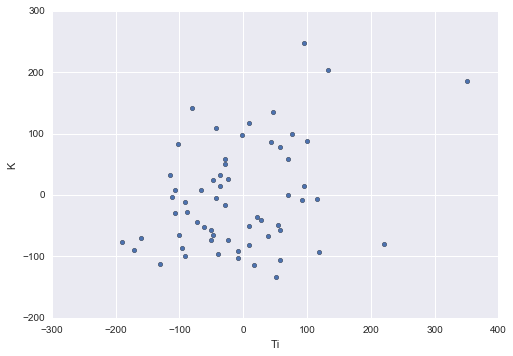

In [1]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/chorSub.csv"
df = pd.read_csv(csv_file)
print df.head()
df.plot(kind="scatter", x="Ti", y="K")
# df.plot(kind="hist")
# sns.pairplot(df)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.41813365052


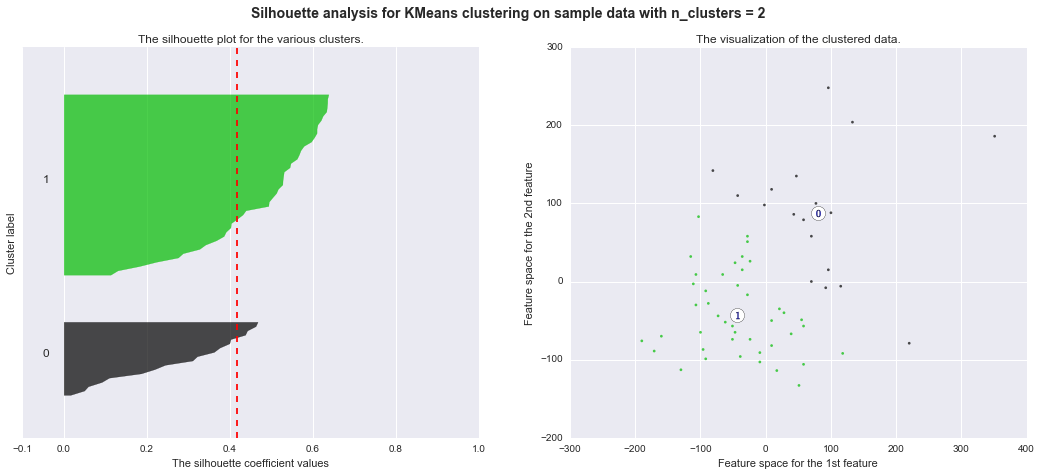

For n_clusters = 3 The average silhouette_score is : 0.388746564019


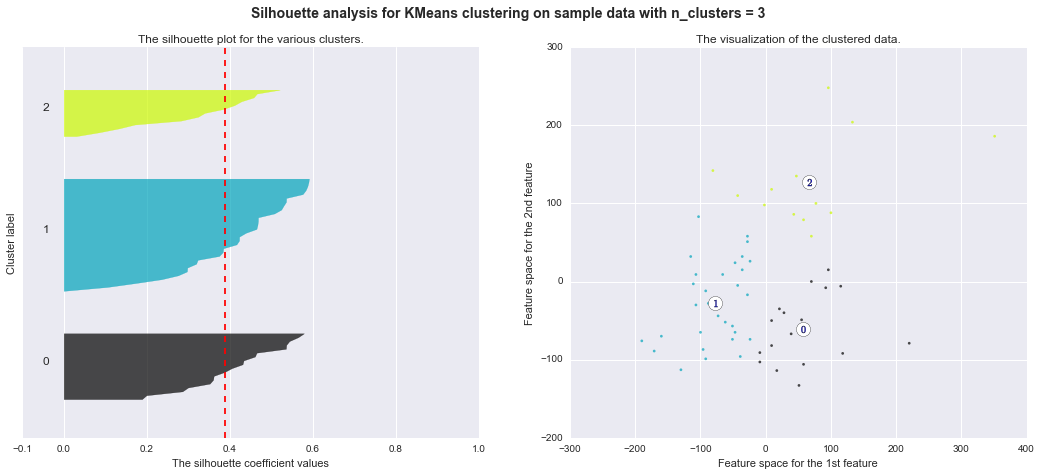

For n_clusters = 4 The average silhouette_score is : 0.388852985051


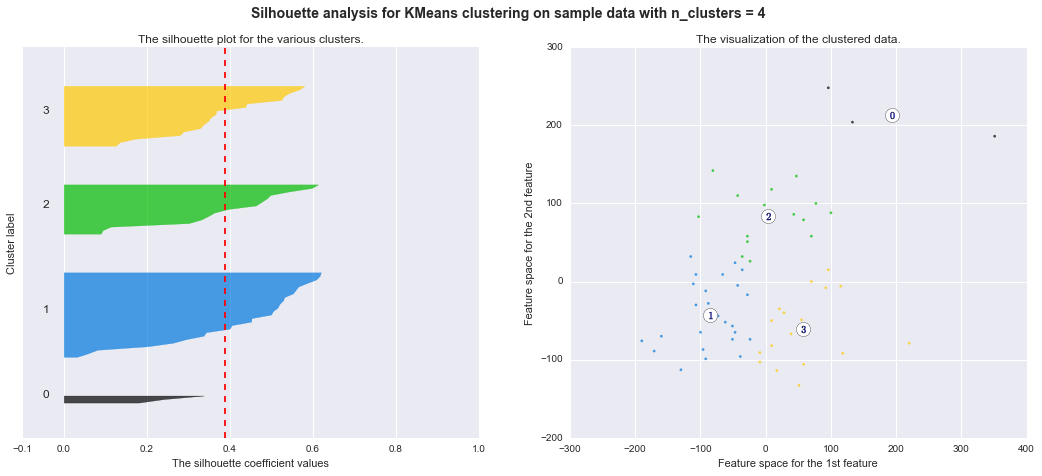

For n_clusters = 5 The average silhouette_score is : 0.386488591729


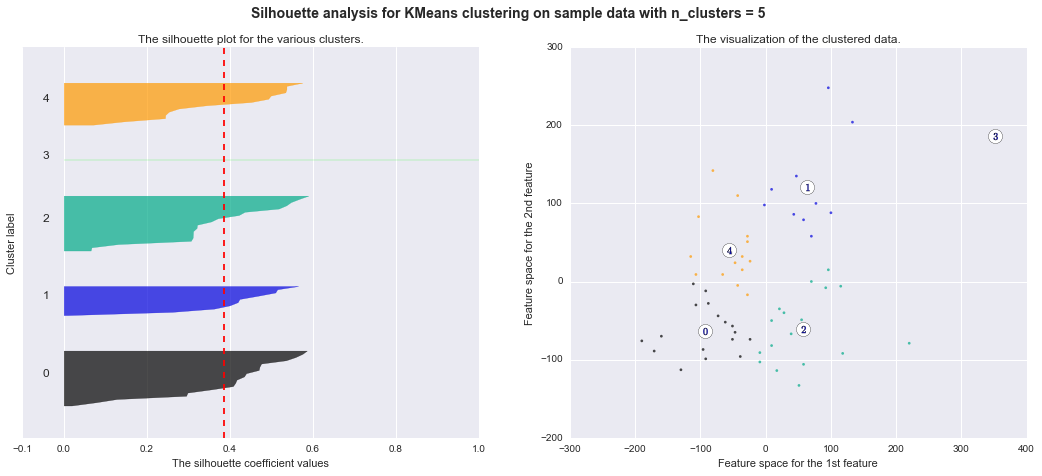

For n_clusters = 6 The average silhouette_score is : 0.385975661613


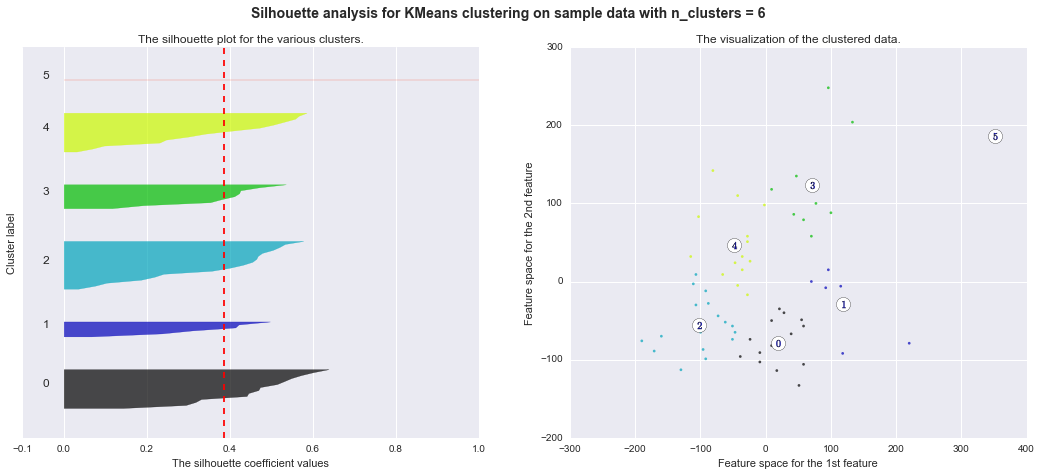

In [2]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


X = df[['Ti', 'K']].values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Plot the Silhouette SSE average over K

Using the "elbow" technique / trick, which may sound really disreputable, but is actually a great way to evaluate the optimal number of K and **intertia** (i.e. the sum of distances to the nearest cluster center).  Basically, we look for the elbow in our scores over a range of K, and chose the value before it levels off.

>"More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified." [Elbow Method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method)

Ideally, the elbow would look like this:

![](http://i.stack.imgur.com/BzwBY.png)

## Pick k for the highest silhoette score

Here, we collect the SC's for over a range of K, and also the SSE (sum of squared error) referenced by the KMeans model object in sklearn as `.intertia_`

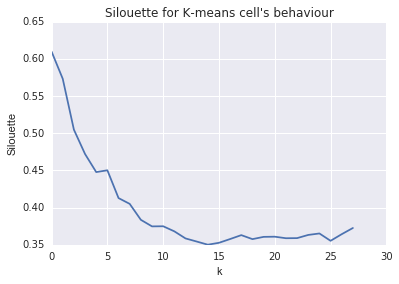

In [80]:
X = wine[['pH', 'alcohol']].values

scores = []
SSE = []

for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    scores.append(silhouette_score(X, labels, metric='euclidean'))
    SSE.append(inertia.mean())

plt.plot(scores)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

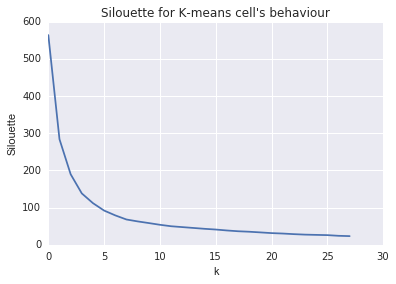

In [81]:
# Plotting SSE / inertia
plt.plot(SSE)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

## Silhouette Takeaways

Look for K with 

- High average (dotted line)
- Positive values
- Good SSE before drop-off (elbow)


An excellent follow up everyone should read about clustering:

[Clustering Countries Real GDP Growth](http://www.turingfinance.com/clustering-countries-real-gdp-growth-part2/)

## Lab:  Cluster Anlaysis with Wine Data

Load in the Wine dataset in the cooresponding assets directory and attempt the following:

Perform K-Means with evaluation metrics for silhouette.

### 1. Load your dataset

In [4]:
wine = pd.read_csv('../assets/datasets/wine.csv')

### 2. Fix any bad data

Maybe you're ok?

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 3. Explore features with scatter plots

You might find it helpful to attempt a technique to visualize the relationships between different features and shape of scatter plots.  What have we used in the past to explore linear relationships?

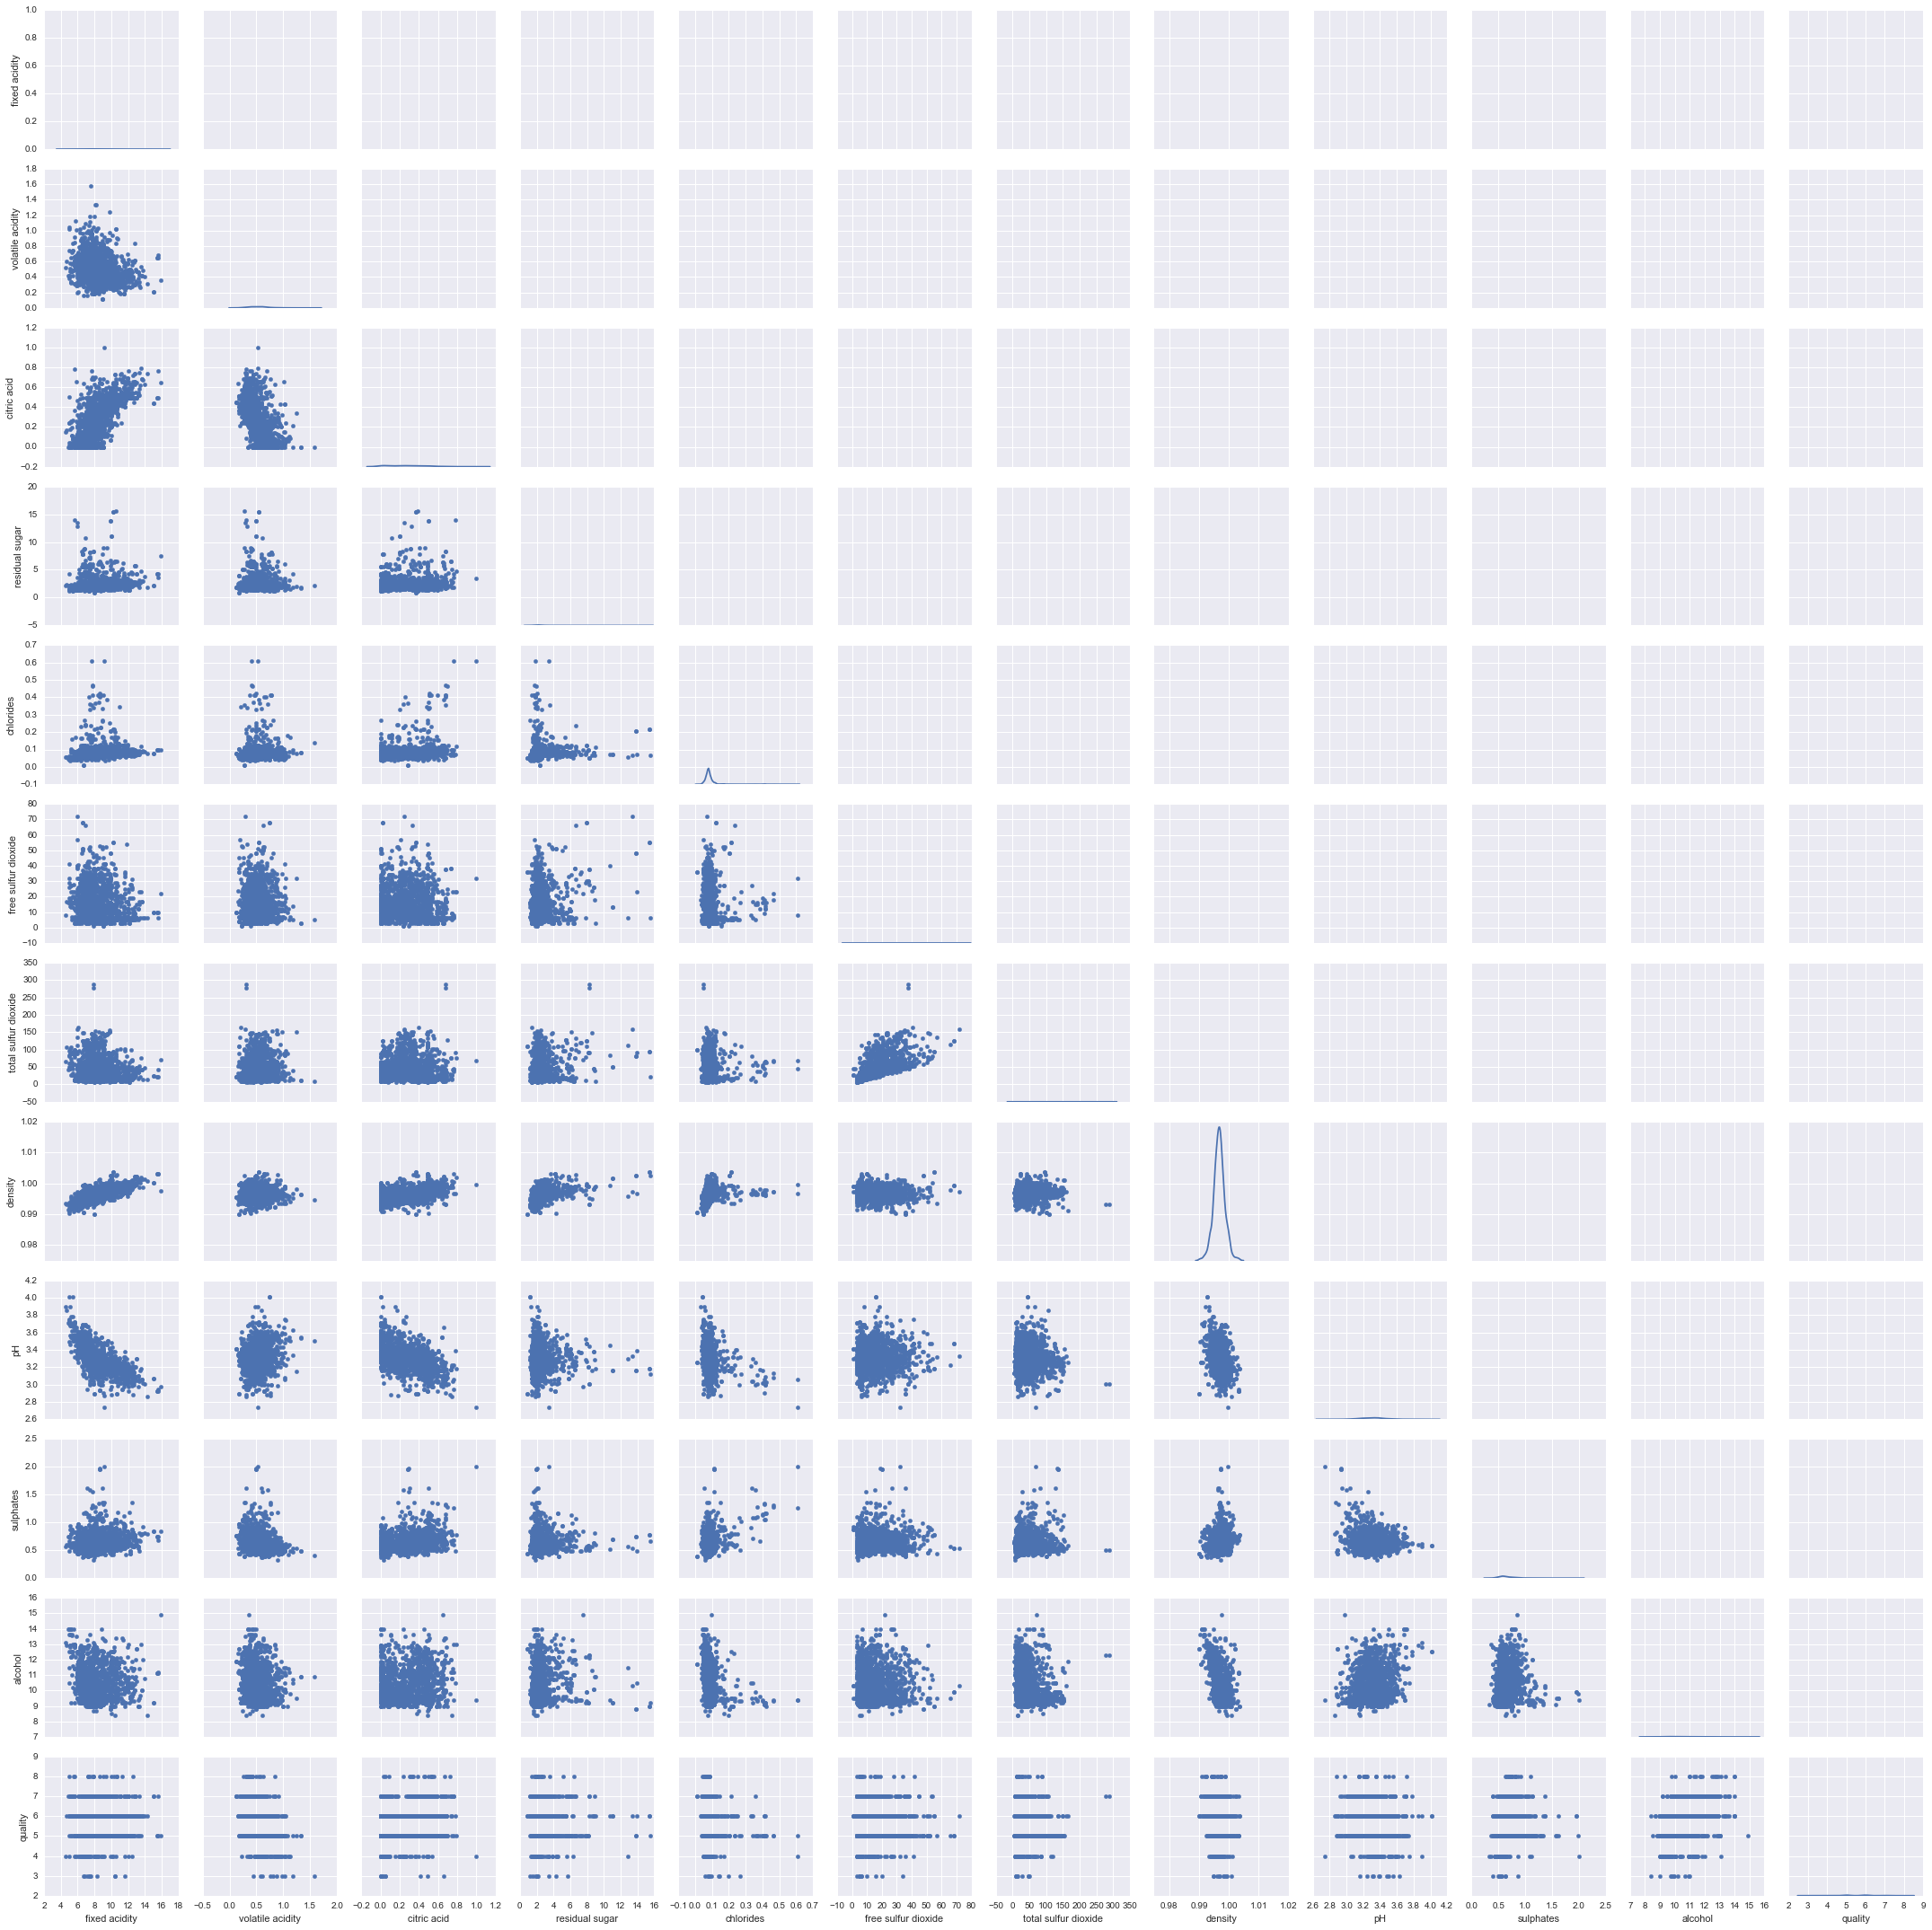

In [12]:
x = sns.PairGrid(wine)

x.map_lower(plt.scatter)
x.map_diag(sns.kdeplot)



### 4.  Optionally look at the distribution of values and look at how your data is distritubed.

### 5. Are there any interesting clusters to be found? 
Identify a few variable combinations to plot in 2D.

In [13]:
features = ['chlorides', 'density']

### 6. Plot KMeans scatters with centroids

In [14]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters = 3)

In [15]:
kms.fit(wine[features])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
cc = kms.cluster_centers_
fig, ax = plt.scatter()

TypeError: scatter() takes at least 2 arguments (0 given)

### 7. Choose scatters that look by eye without using any metrics

### 8.  Perform Evalutation Metrics

- Silhouette score over range of K
- SSE / Inertia over range of K